The architecture of a stacking model involves two or more base models, often referred to as level-0 models, and a meta-model that combines the predictions of the base models, referred to as a level-1 model.

- Level-0 Models (Base-Models): Models fit on the training data and whose predictions are compiled.
- Level-1 Model (Meta-Model): Model that learns how to best combine the predictions of the base models.

In [105]:
%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [106]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [107]:
def get_dataset():
    X, y = make_classification(
        n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1
    )
    return X, y

In [108]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, X, y, scoring="accuracy", cv=cv, n_jobs=-1, error_score="raise"
    )
    return scores

In [109]:
def get_stacking():
    level0 = list()
    level0.append(("lr", LogisticRegression()))
    level0.append(("knn", KNeighborsClassifier()))
    level0.append(("cart", DecisionTreeClassifier()))
    level0.append(("svm", SVC()))
    level0.append(("bayes", GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

In [110]:
def get_models():
    models = dict()
    models["lr"] = LogisticRegression()
    models["knn"] = KNeighborsClassifier()
    models["cart"] = DecisionTreeClassifier()
    models["svm"] = SVC()
    models["bayes"] = GaussianNB()
    models["stacking"] = get_stacking()
    return models

>lr 0.866 (0.029)
>knn 0.931 (0.025)
>cart 0.822 (0.046)
>svm 0.957 (0.020)
>bayes 0.833 (0.031)
>stacking 0.964 (0.020)


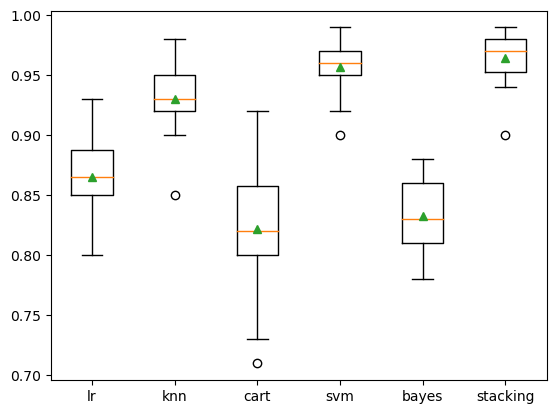

In [111]:
X, y = get_dataset()

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print(">%s %.3f (%.3f)" % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()